# 12 - Enhancing Log Plots With Plot Fills 
  
**Created By:** Andy McDonald  
**Link to Article:** 
  
Matplotlib is a great library to work with in Python and it is one that I always go back to time and time again to work with well logs. Due to its high degree of flexibility it can be tricky to get started with it at first, but once you have mastered the basics it can become a powerful tool for data visualization.

When working with well log data it can be common to apply color fills to the data to help quickly identify areas of interest. For example, identifying lithologies or hydrocarbon bearing intervals. Most of the time when I have been searching on the web for ways to achieve a color fill the articles point to filling between a line and the x-axis on a plot. There are significantly fewer results showing how to apply shading to well log plots, which generally have their longest axis along the y dimension, or to the y-axis in general.

This article forms part of my Python & Petrophysics series. Details of which can be found here.

In this article, I am going to work through four different examples of how we can enhance the look of well log data using simple fills. These include:
- A simple color fill from a curve to the edge of a plot / track
- A color fill from a curve to both edges of a plot / track
- A variable fill from a curve to the edge of a plot / track
- A fill between two curves (density and neutron porosity) that changes when they cross over

## Applying Fills Using matplotlib
### Setting up The Libraries and Loading Data
To begin, we will import a number of common libraries before we start working with the actual data. For this article we will be using pandas, matplotlib and numpy. These three libraries allow us to load, work with and visualise our data. Additionally, the data that is commonly used to store and transfer data is .las files. For this we will use the excellent lasio library to load this data. You can find more about this in my previous post.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import lasio
import numpy as np

### Importing & Viewing LAS Data
The dataset we are using comes from the publicly available Equinor Volve Field dataset released in 2018. The file used in this tutorial is from well 15/9- 19A which contains a nice set of well log data.
To begin loading in our las file, we can use the following method from lasio:

In [2]:
las = lasio.read('Data/15-9-19_SR_COMP.LAS')

In [3]:
df = las.df()
df['DEPTH'] = df.index

To make plotting easier, we will also convert our las file to a pandas dataframe and create a new column containing our depth curve, which is based on the dataframe index. 

We can then find out what is contained within our dataset by calling upon the .describe() method for the dataframe like so.

In [4]:
df.describe()

,AC,CALI,DEN,GR,NEU,RDEP,RMED,DEPTH
count,7007.000000,7007.000000,7084.000000,28117.000000,7096.000000,12223.000000,12223.000000,29754.000000
mean,79.498714,9.611068,2.449055,71.986798,20.117166,2.438382,2.386781,2369.335400
std,18.390705,1.019751,0.165122,32.922780,14.729530,6.631202,5.735731,1309.022166
min,1.025100,6.000000,1.943000,2.766100,2.178300,0.250300,0.179000,102.156800
25%,66.154350,9.142900,2.319975,50.255200,10.631350,0.988000,0.847850,1235.746100
50%,74.661900,9.589400,2.505600,74.998500,15.718550,1.536100,1.490800,2369.335400
75%,93.304550,9.904800,2.585125,92.343800,25.067375,2.434050,2.415400,3502.924700
max,181.813900,20.330400,3.001300,304.333700,146.347400,198.537100,168.604400,4636.514000


This will return back a simple, but very useful summary table detailing the statistics of all the curves.

As we have added the depth curve as a column to the dataframe we can easily get the min and max values of our data. Note that this may not necessarily be the full extent of all the curves.

### Plotting Our Data With A Simple Fill
Now that we have our data loaded and have confirmed we have the curves we want, we can begin plotting our data. For this article I am going to plot directly from the dataframe using the .plot() method.

In the code below, you will see that I am specifying a number of arguments:
- x & y axis
- c specifies the color of the line
- lw specifies the line width
- legend is used to turn on or off a legend. Useful to have on with multiple curves/lines
- figsize specifies the size of our figure in inches

The remaining sections of code allow the setting of the axes limits (ylim and xlim). Note that as we are plotting depth on our y-axis we have to flip the numbers around so that the deepest depth is the first number and the shallowest depth is the second number.

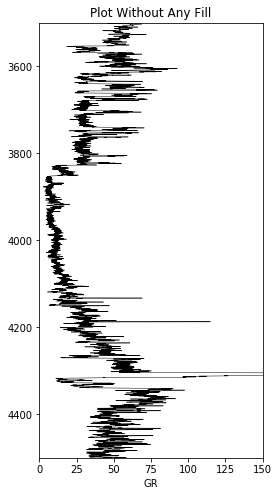

In [5]:
df.plot(x='GR', y='DEPTH', c='black', 
        lw=0.5, legend=False, figsize=(4,8))

plt.ylim(4500, 3500)
plt.xlim(0,150)
plt.title('Plot Without Any Fill')
plt.show()


We can enhance this plot a little bit further by adding a simple fill extending from the left edge of the plot to the curve value. This is achieved by using .fill_betweenx().

To use this function we need to pass the y value (DEPTH), the curve being shaded to (GR) and the value we are shading from the GR curve to (0). We can then easily specify the color of the fill by using the facecolor argument.

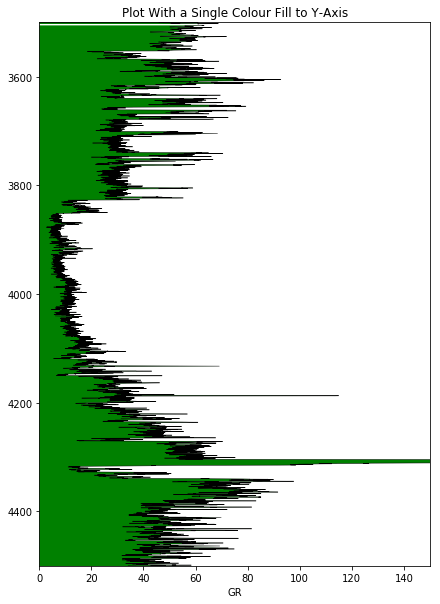

In [6]:
df.plot(x='GR', y='DEPTH', c='black', 
        lw=0.5, legend=False, figsize=(7,10))

plt.fill_betweenx(df['DEPTH'], df['GR'], 0, facecolor='green')
plt.ylim(4500, 3500)
plt.xlim(0,150)
plt.title('Plot With a Single Colour Fill to Y-Axis')
plt.show()

We can go one step further and shade the opposite way by duplicating the line and changing the value to shade to along with the color:

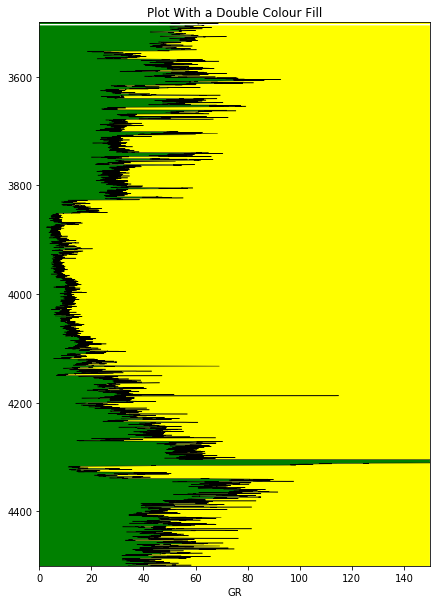

In [8]:
df.plot(x='GR', y='DEPTH', c='black', 
        lw=0.5, legend=False, figsize=(7,10))

plt.fill_betweenx(df['DEPTH'], df['GR'], 0, facecolor='green')
plt.fill_betweenx(df['DEPTH'], df['GR'], 150, facecolor='yellow')
plt.ylim(4500, 3500)
plt.xlim(0,150)
plt.title('Plot With a Double Colour Fill')
plt.show()

### Plotting Our Data With A Variable Fill
We can take our plot to the next level by applying a variable fill between the gamma ray curve and the y-axis. You will notice that the code below has expanded significantly compared to the code above.

We first have to identify how many colors we will split our shading into. This is done by assigning our x-axis values to a variable and working out the absolute difference between them using span = abs(left_col_value - right_col_value). This gives us our range of values.

We then grab a color map of our choosing using from a wide list of colormaps using cmap= plt.get_cmap('nipy_spectral'). A full list of colormaps can be found here. For this example, I have selected nipy_spectral.

The next section of code looks similar to the above with the exception that the x limits are now controlled by the variables left_col_value. and right_col_value. This allows us to change the value for the limits in just one place rather than in multiple places.

The final section, the for loop, loops through each of the color index values in the array that was created on line 14 and obtains a color from the color map. We then (line 26) use the fill_betweenx method to apply that color. Notice that we now using where = curve >= index in the arguments. This allows us to shade the appropriate color when the curve value is greater than or equal to the index value.

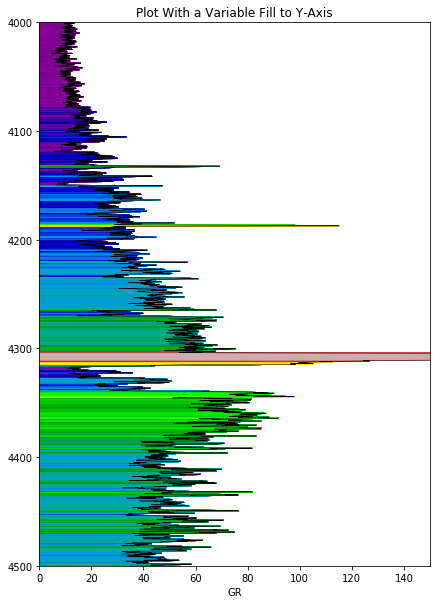

In [9]:
left_col_value = 0
right_col_value = 150

#assign the column to a variable for easier reading
curve = df['GR']

#calculate the span of values
span = abs(left_col_value - right_col_value)

#assign a color map
cmap = plt.get_cmap('nipy_spectral')

#create array of values to divide up the area under curve
color_index = np.arange(left_col_value, right_col_value, span / 100)

#setup the plot
df.plot(x='GR', y='DEPTH', c='black', lw=0.5, legend=False, figsize=(7,10))
plt.ylim(4500, 4000)
plt.xlim(left_col_value, right_col_value)
plt.title('Plot With a Variable Fill to Y-Axis')

#loop through each value in the color_index
for index in sorted(color_index):
    index_value = (index - left_col_value)/span
    color = cmap(index_value) #obtain colour for color index value
    plt.fill_betweenx(df['DEPTH'], 0 , curve, where = curve >= index,  color = color)
plt.savefig('12_3.png', dpi=100)
plt.show()

### Applying Shading Between Two Curves With Different Scales
Our final example illustrates how we can apply lithology shading to our density and neutron porosity curves. These two curves are often shaded depending on the crossover. When density moves to the left of neutron porosity, we could potentially have a a porous reservoir rock. When the crossover occurs the opposite way, with density to the right of neutron porosity we could potentially have shale rock.

Note that this is very simplified and there are a number of different reasons why these two curves crossover one another. 

The first step to display our density and neutron porosity data, is to add them to a plot. In this instance we have to create a figure and add multiple axes to it as opposed to using df.plot(). To allow us to plot the neutron porosity we have to add it on as an extra axis. Using ax1.twiny() we can share the depth curve between the two curves.

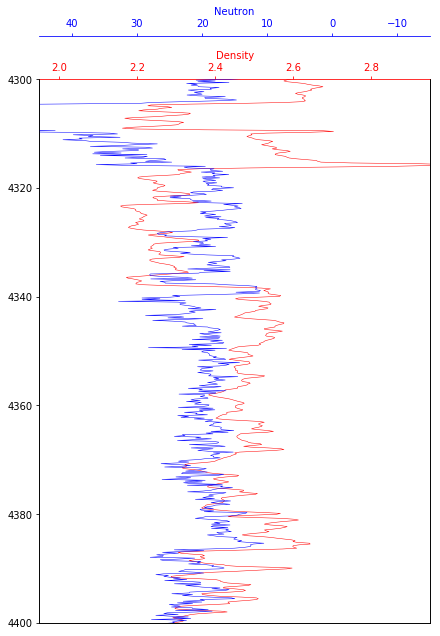

In [10]:
fig = plt.subplots(figsize=(7,10))

ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
ax2 = ax1.twiny()

ax1.plot('DEN', 'DEPTH', data=df, color='red', lw=0.5)
ax1.set_xlim(1.95, 2.95)
ax1.set_xlabel('Density')
ax1.xaxis.label.set_color("red")
ax1.tick_params(axis='x', colors="red")
ax1.spines["top"].set_edgecolor("red")

ax2.plot('NEU', 'DEPTH', data=df, color='blue', lw=0.5)
ax2.set_xlim(45, -15)
ax2.set_xlabel('Neutron')
ax2.xaxis.label.set_color("blue")
ax2.spines["top"].set_position(("axes", 1.08))
ax2.tick_params(axis='x', colors="blue")
ax2.spines["top"].set_edgecolor("blue")


for ax in [ax1, ax2]:
    ax.set_ylim(4400, 4300)
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    
plt.show()

We can now add the shading. Which is a little bit more complicated than expected as the two curves have different scales. Generally neutron porosity is scaled from 45 to -15 porosity units (p.u) (0.45 to -0.15 for decimal) and density from 1.95 to 2.95 g/cc.

We have to add in an extra bit of code that will scale one of the curves to the unit scale of the other. 


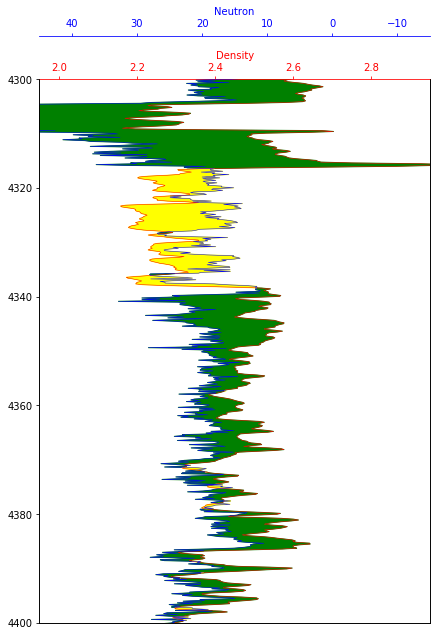

In [11]:
fig = plt.subplots(figsize=(7,10))

ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
ax2 = ax1.twiny()

ax1.plot('DEN', 'DEPTH', data=df, color='red', lw=0.5)
ax1.set_xlim(1.95, 2.95)
ax1.set_xlabel('Density')
ax1.xaxis.label.set_color("red")
ax1.tick_params(axis='x', colors="red")
ax1.spines["top"].set_edgecolor("red")

ax2.plot('NEU', 'DEPTH', data=df, color='blue', lw=0.5)
ax2.set_xlim(45, -15)
ax2.set_xlabel('Neutron')
ax2.xaxis.label.set_color("blue")
ax2.spines["top"].set_position(("axes", 1.08))
ax2.tick_params(axis='x', colors="blue")
ax2.spines["top"].set_edgecolor("blue")

x1=df['DEN']
x2=df['NEU']

x = np.array(ax1.get_xlim())
z = np.array(ax2.get_xlim())

nz=((x2-np.max(z))/(np.min(z)-np.max(z)))*(np.max(x)-np.min(x))+np.min(x)

ax1.fill_betweenx(df['DEPTH'], x1, nz, where=x1>=nz, interpolate=True, color='green')
ax1.fill_betweenx(df['DEPTH'], x1, nz, where=x1<=nz, interpolate=True, color='yellow')

for ax in [ax1, ax2]:
    ax.set_ylim(4400, 4300)
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

This allows us to easily identify where potential reservoir sections are. To confirm what these sections are, further analysis would need to be carried out. You should always look at the other logging curves when doing an interpretation to aid your understanding and interpretation.

## Summary
In summary, matplotlib is a powerful data visualization tool when working with well log data. We can easily display our logs on tracks and fill in between the lines to aid visualization and interpretation of our data. In this article I have covered how to apply a fixed color fill and a variable gradient fill between our curve and the edge of the plot and also how to fill between two curves that are on different scales.